In [11]:
!pip install wordcloud

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as mpatches
from wordcloud import WordCloud

In [2]:
old_df = pd.read_csv('../Datas/colors.csv')
colors = pd.read_csv('../Datas/colors_cleaned.csv')
pieces = pd.read_csv('../Datas/parts.csv')
display(colors.head(2))

,piece_id,is_spare,couleur_id,couleur_nom,couleur_code,is_trans,set_id,set_nom,set_annee,set_nb_pieces,univers_id,univers_nom
0,brickslot0004,f,15,White,#FFFFFF,f,700.3-1,Medium Gift Set (ABB),1949,142,365,System
1,brickslot0002,f,4,Red,#C91A09,f,700.3-1,Medium Gift Set (ABB),1949,142,365,System


### Nombre de couleurs uniques LEGO

In [3]:
nb_couleur = old_df['id'].nunique()
nb_couleurs_utilisées = colors['couleur_id'].nunique()

print('Nombre de couleurs de la gamme LEGO en 2023 :', nb_couleur)
print('Versus nombre de couleurs de la gamme LEGO utilisés en 2023 :', nb_couleurs_utilisées)
print('Soit', nb_couleur - nb_couleurs_utilisées, 'existantes mais non listées au sein des sets de jeux.')

Nombre de couleurs de la gamme LEGO en 2023 : 231
Versus nombre de couleurs de la gamme LEGO utilisés en 2023 : 201
Soit 30 existantes mais non listées au sein des sets de jeux.


### Afficher le nombre de couleurs existantes par année

In [4]:
# Supprimer les doublons de codes hexadécimaux pour chaque année
unique_colors_per_year = colors.drop_duplicates(subset=['set_annee', 'couleur_code'])

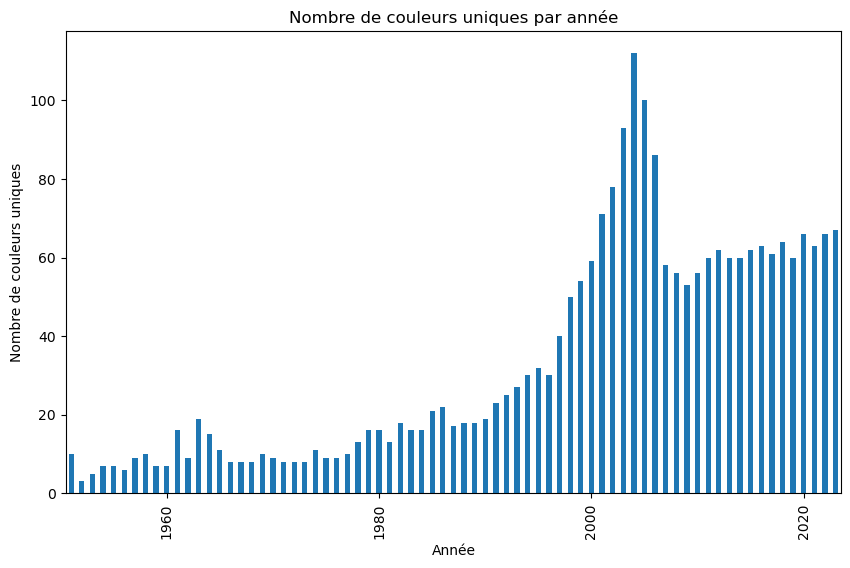

In [5]:
# Grouper les données par année et compter le nombre de couleurs uniques
colors_by_year = unique_colors_per_year.groupby('set_annee')['couleur_code'].count()

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
legend_years = [1960, 1980, 2000, 2020]

# Tracer les barres
bars = colors_by_year.plot(kind='bar')

# Créer une liste de positions pour les jalons d'année que vous souhaitez afficher sur l'axe x
x_positions = [colors_by_year.index.get_loc(year) for year in legend_years]

# Modifier les labels de l'axe x pour afficher uniquement les années souhaitées
plt.xticks(x_positions, legend_years)

# Créer une légende personnalisée avec les années spécifiées
legend_labels = [str(year) for year in legend_years]

plt.title("Nombre de couleurs uniques par année")
plt.xlabel("Année")
plt.ylabel("Nombre de couleurs uniques")
plt.show()

### Faire apparaître sur le graph précédent des barres composées de chaque couleur

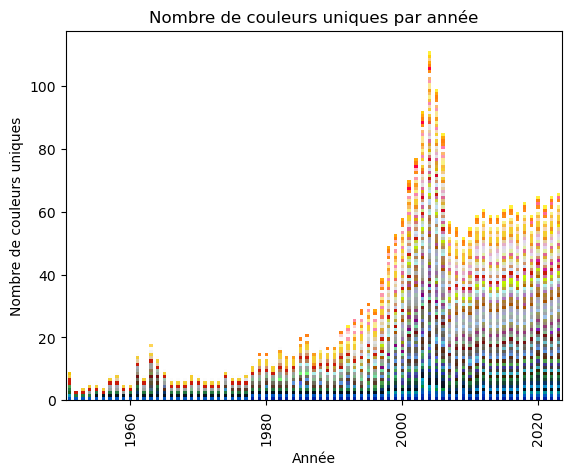

LEGO existe depuis 74 ans, pour autant ce n'est que dans les 25 dernières années que le nombre moyen de couleurs par an a été multiplication par 5 , passant d'une moyenne de 13 couleurs entre 1949 et 1996 à une moyenne de 65 couleurs de 1996 à nos jours.



In [6]:
# Grouper les données par année et compter le nombre de couleurs uniques
colors_by_year = unique_colors_per_year.groupby(['set_annee','couleur_code'])['couleur_code'].count().unstack()

# Liste des codes hexadécimaux à partir des noms de colonnes
color_hex_codes = colors_by_year.columns

#Sélectionner les années que je veux faire apparaître en légende
legend_years = [1960, 1980, 2000, 2020]

# Tracer le graphique avec les couleurs de LEGO
ax = colors_by_year.plot(kind='bar', stacked=True, color=color_hex_codes, legend=False)

# Modifier les labels de l'axe x pour afficher uniquement les années souhaitées
plt.xticks(x_positions, legend_years)

# Créer une légende personnalisée avec les années spécifiées
legend_labels = [str(year) for year in legend_years]

plt.title("Nombre de couleurs uniques par année")
plt.xlabel("Année")
plt.ylabel("Nombre de couleurs uniques")
plt.show()

# Filtrer les données pour les années entre 1949 et 1996
before_96 = unique_colors_per_year[(unique_colors_per_year['set_annee'] <= 1996)]
after_96 = unique_colors_per_year[(unique_colors_per_year['set_annee'] > 1996) & (unique_colors_per_year['set_annee'] <= 2023)]

sum_colors_bf_96 = {}

# Avant 96
for annee in range(1949, 1997): # De 1949 à 1996 inclus
    annee_data = before_96[before_96['set_annee'] == annee]
    unique_colors = annee_data['couleur_id'].nunique()
    sum_colors_bf_96[annee] = unique_colors

# Tout additionner puis diviser afin d'obtenir la moyenne arrondi sans décimal
avg_colors_bf_96 = int(sum(sum_colors_bf_96.values()) / (1996 - 1949 + 1))


# Après 96
sum_colors_after_96 = {}

for annee in range(1997, 2024): # De 1997 à 2023 inclus
    annee_data = after_96[after_96['set_annee'] == annee]
    unique_colors = annee_data['couleur_id'].nunique()
    sum_colors_after_96[annee] = unique_colors

avg_colors_after_96 = int(sum(sum_colors_after_96.values()) / (2023 - 1997 + 1))

percent_growth = avg_colors_after_96 / avg_colors_bf_96
percent_growth = int(percent_growth)

print('LEGO existe depuis 74 ans, pour autant ce n\'est que dans les 25 dernières années que le nombre moyen de couleurs par an a été multiplication par', percent_growth, ', passant d\'une moyenne de', avg_colors_bf_96, 'couleurs entre 1949 et 1996 à une moyenne de', avg_colors_after_96,'couleurs de 1996 à nos jours.')
print('')

### Ordre de grandeur des couleurs par nombre de pièces

In [12]:
# Rappel ma df 'colors' est déjà rangé par pièce, une ligne = une pièce id
color_rank = colors.groupby(['couleur_id','couleur_nom','couleur_code'])['piece_id'].count().reset_index()
color_rank.columns = ['couleur_id', 'couleur_nom','couleur_code', 'nombre_pieces']
color_rank = color_rank.sort_values(by='nombre_pieces', ascending=False)

display(color_rank.head(5))

id_neg_color = color_rank[color_rank['couleur_id'] == -1]

# Pour réaliser le graph sous tableau
color_rank.to_csv('../Datas/color_rank.csv', index = False)

display(id_neg_color)

,couleur_id,couleur_nom,couleur_code,nombre_pieces
1,0,Black,#05131D,196368
16,15,White,#FFFFFF,124682
53,71,Light Bluish Gray,#A0A5A9,119722
54,72,Dark Bluish Gray,#6C6E68,88334
5,4,Red,#C91A09,83906


,couleur_id,couleur_nom,couleur_code,nombre_pieces
0,-1,[Unknown],#0033B2,7


### Combien de couleurs ne sont affectées qu'à une seule pièce ?

In [13]:
solo_piece_colors = color_rank[color_rank['nombre_pieces'] == 1]
solo_piece_colors = solo_piece_colors.merge(colors[['couleur_id','piece_id','set_nom','univers_nom']], on='couleur_id', how='left') 
solo_piece_colors = solo_piece_colors.merge(pieces[['part_num','name']], left_on='piece_id', right_on='part_num', how='left').drop('part_num',axis=1)
solo_piece_colors.insert(5, 'piece_nom', solo_piece_colors.pop('name'))

sum_solo_piece_colors = solo_piece_colors.shape[0]

display(solo_piece_colors.head(10))
print('Il existe ', sum_solo_piece_colors, 'couleurs créées uniquement pour produire chacune une pièce.')
print('Sachant que 5 de ces pièces sont Duplo et 3 autres font référence à des produits partenaires tels Avatar, DC Super Hero et Mc Donalds.')

,couleur_id,couleur_nom,couleur_code,nombre_pieces,piece_id,piece_nom,set_nom,univers_nom
0,1080,Light Tan,#F3C988,1,56093,"Animal, Lemur (Momo)",Air Temple,Avatar: The Last Airbender
1,1079,Duplo Light Green,#60BA76,1,44403c04,Duplo Cart with Wheels and Yellow Handlebars,Stripy's Flower Cart,Little Robots
2,1091,Warm Yellowish Orange,#FFCB78,1,6490,Duplo Plate 8 x 16,Playhouse,Playhouse
3,1052,Glitter Trans-Orange,#F08F1C,1,65580,Weapon Harpoon / Spear Tip,Stargirl,DC Super Heroes
4,1099,Glitter Trans-Pink,#E4ADC8,1,clikupn0022d,"Clikits Icon Accent, Star 3 1/4 x 3 1/4",Hip Hair Set,Clikits
5,1081,Rust Orange,#872B17,1,48394,Sports Skateboard Top from McDonald's Promotio...,Gray Vest Skateboarder,Gravity Games
6,1101,Duplo Dark Purple,#5F27AA,1,44611,"Duplo Tile, Modified 4 x 4 Studs on Edge and G...",Tiny & Friends,Little Robots
7,1075,Duplo Medium Blue,#3E95B6,1,44403c02,Duplo Cart with Wheels and Yellow Cross Lift,Tiny's Lift Cart,Little Robots
8,64,Chrome Black,#1B2A34,1,49757,"Key Chain, Chrome Chain and Ring with 2 x 4 Brick",Chrome Black Brick Key Chain,Key Chain
9,1078,Duplo Medium Green,#468A5F,1,44513,Duplo Baseplate Multi Leveled with Slopes 12 x...,Gardening with Stripy,Little Robots


Il existe  10 couleurs créées uniquement pour produire chacune une pièce.
Sachant que 5 de ces pièces sont Duplo et 3 autres font référence à des produits partenaires tels Avatar, DC Super Hero et Mc Donalds.


### Couleurs par univers

In [14]:
univers_colors = colors.groupby(['univers_nom','couleur_id'])['couleur_id'].count().unstack()

sum_univers_colors = univers_colors.apply(lambda row: row.count(), axis=1).reset_index(name='nb_couleurs')
sum_univers_colors = sum_univers_colors.sort_values(by='nb_couleurs', ascending=False)

#Le Database Sets n'est pas pertinent car pas réellement univers du coup il est écarté pour ce classement
sum_univers_colors = sum_univers_colors.drop(sum_univers_colors[sum_univers_colors['univers_nom'] == 'Database Sets'].index, axis=0)

#garder que le top 10
top_ten = sum_univers_colors.head(10)

display(top_ten)

,univers_nom,nb_couleurs
141,Harry Potter,92
28,Belville,84
303,Star Wars,80
67,Creator,79
123,Friends,76
218,Ninjago,75
30,Bionicle,73
101,Duplo and Explore,73
60,Clocks and Watches,73
304,Stationery and Office Supplies,72


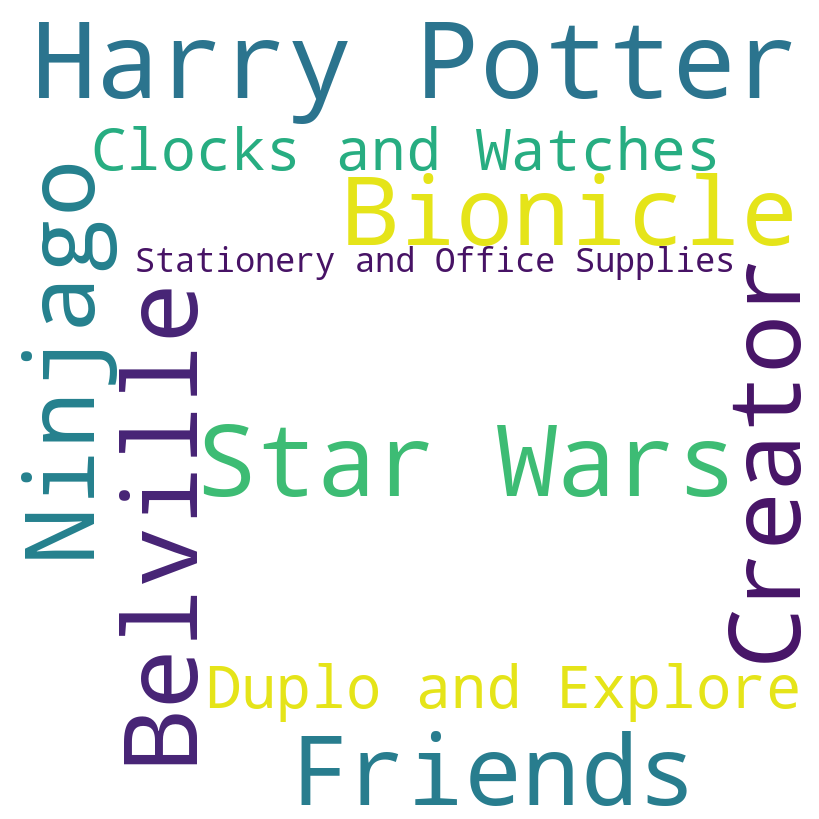

In [18]:
# Dico avec l'univers et le nombre de couleurs
word_freq = {row['univers_nom']: row['nb_couleurs'] for _, row in top_ten.iterrows()}

# Créer l'objet WordCloud en utilisant les fréquences de mots et en mélangeant l'orientation des mots
wordcloud = WordCloud(width=800, height=800, background_color='white', prefer_horizontal=0.5).generate_from_frequencies(word_freq)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


### Exemple : Pour Harry Potter combien de couleurs ont été inventées uniquement pour cet univers ?

### Exemple de l'intérêt de la variété de couleur dans le temps pour détailler les plantes

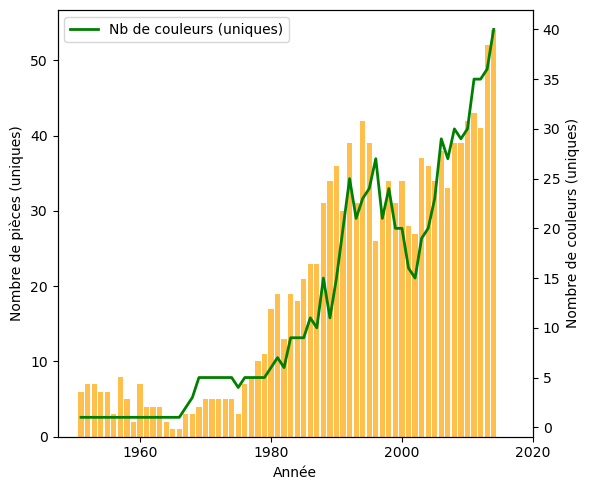

À travers les années le nombre de pièces faisant référence à des plantes a progressé drastiquement, idem pour les couleurs.
On peut donc émettre l'hypothèse que cette diversité du nombre de couleurs a permis de créer une diversité de détails à l'échelle des pièces.


In [16]:
plants = pieces[pieces['name'].str.contains('plant', case=False)]
plants = plants.drop('part_cat_id', axis=1).drop('part_material', axis=1)

plants.columns = ['piece_id','piece_nom']

plant_colors = plants.merge(colors[['piece_id','couleur_id','couleur_nom','couleur_code', 'set_annee']], on='piece_id', how='left')

#Suite au merge j'ai des lignes avec NaN dans la colonne 'set_annee', je dois les supprimer
plant_colors = plant_colors.dropna(subset=['set_annee'])
plant_colors['set_annee'] = plant_colors['set_annee'].astype(str)

plant_colors_per_year = plant_colors.groupby('set_annee')['couleur_code'].nunique().reset_index()
plant_colors_per_year.columns = ['Annee','Nb_couleurs']
plant_colors_per_year = plant_colors_per_year.sort_values(by='Annee', ascending=True)

#Créer le df qui servira à extraire le nb de pièces 'plantes' par année
plant_pieces = plants.merge(colors[['piece_id', 'set_annee']], on='piece_id', how='left')

#Suite au merge j'ai des lignes avec NaN dans la colonne 'set_annee', je dois les supprimer
plant_pieces = plant_pieces.dropna(subset=['set_annee'])
plant_pieces['set_annee'] = plant_pieces['set_annee'].astype(str)

plant_pieces_per_year = plant_pieces.groupby('set_annee')['piece_id'].nunique().reset_index()
plant_pieces_per_year.columns = ['Annee','Nb_pieces']
plant_pieces_per_year = plant_pieces_per_year.sort_values(by='Annee', ascending=True)

#merge le df plant_colors_per_year avec celui plant_pieces_per_year
plants_per_year = plant_colors_per_year.merge(plant_pieces_per_year, on='Annee', how='left')
plants_per_year['Annee'] = plants_per_year['Annee'].astype(str)

#Sélectionner les années que je veux faire apparaître en légende
legend_years = [1960, 1980, 2000, 2020]

fig, ax1 = plt.subplots(figsize=(6, 5))

ax1.bar(plants_per_year['Annee'], plants_per_year['Nb_pieces'], color='orange', alpha=0.7, label='Nb de pièces (uniques)')
ax1.set_label('Nombre de pièces (uniques)')

# Créer un deuxième axe Y partageant le même axe X
ax2 = ax1.twinx()

ax2.plot(plants_per_year['Annee'], plant_colors_per_year['Nb_couleurs'], marker='', color='green', linestyle='-', linewidth=2, label='Nb de couleurs (uniques)')
ax2.set_label('Nombre de couleurs (uniques)')

# Modifier les labels de l'axe x pour afficher uniquement les années souhaitées
plt.xticks(x_positions, legend_years)

# Créer une légende personnalisée avec les années spécifiées
legend_labels = [str(year) for year in legend_years]

ax1.set_title('')
ax1.set_xlabel('Année')
ax1.set_ylabel('Nombre de pièces (uniques)')
ax2.set_ylabel('Nombre de couleurs (uniques)')

plt.legend()
plt.tight_layout()
plt.show()

print('À travers les années le nombre de pièces faisant référence à des plantes a progressé drastiquement, idem pour les couleurs.')
print('On peut donc émettre l\'hypothèse que cette diversité du nombre de couleurs a permis de créer une diversité de détails à l\'échelle des pièces.')

### Corrélation entre le développement du nombre d'univers et celui du nombre de couleurs

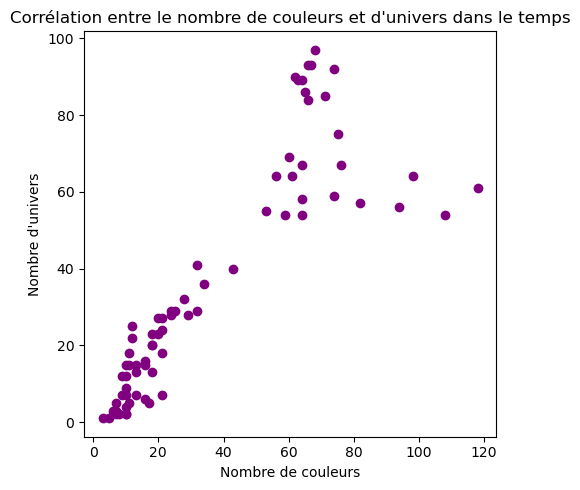

On voit que dans un premier temps le nombre de couleurs évolue conjointement avec la multiplication des univers jusqu'à un seuil, s'en suit une dissociation entre nombre de couleurs et nombre d'univers. Cela peut s'expliquer par une multiplication des couleurs au sein des univers.


In [17]:
univers_per_year = colors.groupby('set_annee')['univers_id'].nunique().reset_index()
colors_per_year = colors.groupby('set_annee')['couleur_id'].nunique().reset_index()
colors_and_univers = colors_per_year.merge(univers_per_year, on='set_annee', how='left')
colors_and_univers['set_annee'] = colors_and_univers['set_annee'].astype(str)

#Rechercher des lignes nulles au cas où
nan_couleur = colors_and_univers['couleur_id'].isna()
nan_couleur_row = colors_and_univers[nan_couleur]

nan_univers = colors_and_univers['univers_id'].isna()
nan_univers_row = colors_and_univers[nan_univers]

colors_and_univers = colors_and_univers.sort_values(by='set_annee', ascending=True )

#Sélectionner les années que je veux faire apparaître en légende
legend_years = [1960, 1980, 2000, 2020]

plt.figure(figsize=(5, 5))
plt.scatter(colors_and_univers['couleur_id'], colors_and_univers['univers_id'], color='purple', marker='o', label='Données')

plt.xlabel('Nombre de couleurs')
plt.ylabel('Nombre d\'univers')
plt.title('Corrélation entre le nombre de couleurs et d\'univers dans le temps')
plt.tight_layout()
plt.show()

print('On voit que dans un premier temps le nombre de couleurs évolue conjointement avec la multiplication des univers jusqu\'à un seuil, s\'en suit une dissociation entre nombre de couleurs et nombre d\'univers. Cela peut s\'expliquer par une multiplication des couleurs au sein des univers.')